In [1]:
import os, sys
sys.path.insert(0, os.path.dirname(os.getcwd()))

In [2]:
import optuna
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from kennard_stone import KFold
import pandas as pd
from yi.models import Objective
from yi.tools import get_learning_curve

In [3]:
SEED = 334

In [4]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns = boston.feature_names)
y = pd.Series(boston.target, name = 'PRICE')

In [5]:
rf = RandomForestRegressor(n_jobs = -1, random_state = SEED)

In [6]:
objective = Objective(rf, X, y, scoring = 'neg_root_mean_squared_error', n_jobs = -1, random_state = SEED, cv = KFold(n_splits=5))

In [7]:
study = optuna.create_study(direction = 'maximize', sampler = objective.sampler)
study.optimize(objective, n_trials = 100)

hed with value: -3.1462661487185435 and parameters: {'min_samples_split': 9, 'max_depth': 37, 'n_estimators': 405}. Best is trial 3 with value: -3.126348444255087.
[I 2021-04-27 13:04:47,828] Trial 10 finished with value: -3.080839997264829 and parameters: {'min_samples_split': 2, 'max_depth': 72, 'n_estimators': 484}. Best is trial 10 with value: -3.080839997264829.
[I 2021-04-27 13:04:49,735] Trial 11 finished with value: -3.079965166015086 and parameters: {'min_samples_split': 2, 'max_depth': 70, 'n_estimators': 489}. Best is trial 11 with value: -3.079965166015086.
[I 2021-04-27 13:04:51,579] Trial 12 finished with value: -3.0818046821740532 and parameters: {'min_samples_split': 2, 'max_depth': 71, 'n_estimators': 495}. Best is trial 11 with value: -3.079965166015086.
[I 2021-04-27 13:04:53,403] Trial 13 finished with value: -3.0832577299484645 and parameters: {'min_samples_split': 3, 'max_depth': 71, 'n_estimators': 498}. Best is trial 11 with value: -3.079965166015086.
[I 2021-04

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Trials', ylabel='Objective Values'>)

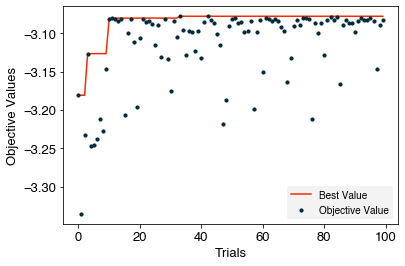

In [8]:
get_learning_curve(study)

In [9]:
rf_opt = clone(rf).set_params(**study.best_params)

In [10]:
kf = KFold(cv = 5)
for i_train, i_test in kf.split(X, y):
    rf_opt = clone(rf_opt)
    X_train, y_train = X.loc[i_train], y[i_train]
    X_test, y_test = X.loc[i_test], y[i_test]

    rf_opt.fit(X_train, y_train)
    print(mean_squared_error(y_test, rf_opt.predict(X_test), squared = False))

2.1664063387815515
2.3333393583107696
2.760329826069526
3.259868654585336
4.860279333338085
